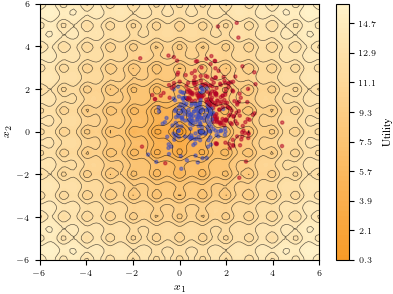

In [ ]:
import torch
from botorch.test_functions.synthetic import Ackley
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list("custom_ackley", ["#F89B28", "#FFF2C9"], N=100)
torch.manual_seed(0)
from tueplots import bundles
bundles.icml2024()

n_samples = 400
d = 2
n_epochs = 300
learning_rate = 0.01

utility_fn = Ackley(dim=d)
items = torch.randn(n_samples, d) + torch.ones(n_samples, d)
utilities = utility_fn(items)
preference = (utilities > utilities.mean()).float().unsqueeze(1)

# visualize the function as a heating map
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)
Z = utility_fn(torch.tensor(np.c_[X.ravel(), Y.ravel()])).reshape(X.shape)

with plt.rc_context(bundles.icml2024(usetex=True, family="serif")):
    plt.figure(figsize=(4, 3))
    contour = plt.contourf(X, Y, Z.numpy(), 50, cmap=custom_cmap)
    plt.contour(X, Y, Z.numpy(), levels=15, colors='black', linewidths=0.5, alpha=0.6)
    plt.scatter(items[:, 0], items[:, 1], c=preference.numpy(), cmap='coolwarm', s=5, alpha=0.5)
    plt.colorbar(contour, label=r'$f(x)$')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.show()


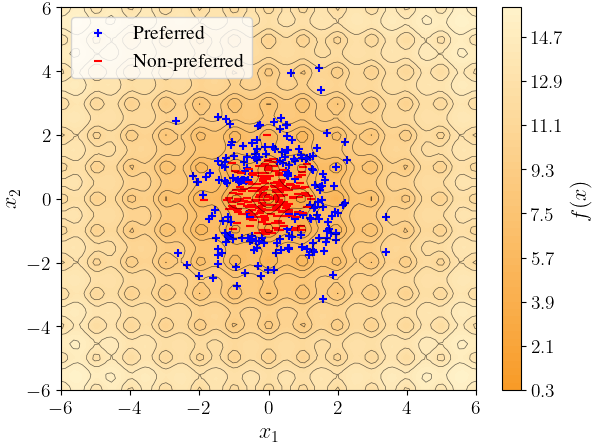

In [7]:
import torch
from botorch.test_functions.synthetic import Ackley
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Custom colormap and reproducibility
custom_cmap = LinearSegmentedColormap.from_list("custom_ackley", ["#F89B28", "#FFF2C9"], N=100)
torch.manual_seed(0)

from tueplots import bundles
bundles.icml2024()
plot_config = bundles.icml2024(usetex=True, family="serif")
plot_config.update({
    "font.size": 14,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "axes.titlesize": 16,
})

# Settings and function evaluation
n_samples = 400
d = 2
n_pairs = 10000  # number of random pair comparisons
utility_fn = Ackley(dim=d)
items = torch.randn(n_samples, d)
utilities = utility_fn(items)

# Generate pairwise comparisons randomly Initialize a score vector for each point
# Randomly sample pairs (ensure we don't compare a point with itself)
scores = torch.zeros(n_samples)
pair_indices = torch.randint(0, n_samples, (n_pairs, 2))
mask = pair_indices[:, 0] != pair_indices[:, 1]
pair_indices = pair_indices[mask]

for i, j in pair_indices:
    if utilities[i] > utilities[j]:
        scores[i] += 1  # win for point i
        scores[j] -= 1  # loss for point j
    else:
        scores[i] -= 1  # loss for point i
        scores[j] += 1  # win for point j

# Classify points based on their aggregated score
preferred = scores > 0
non_preferred = scores < 0
neutral = scores == 0  # optional

# Visualize the Ackley function as a heat map
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)
Z = utility_fn(torch.tensor(np.c_[X.ravel(), Y.ravel()])).reshape(X.shape)

with plt.rc_context(plot_config):
    plt.figure(figsize=(6, 4.5))
    contour = plt.contourf(X, Y, Z.numpy(), 50, cmap=custom_cmap)
    plt.contour(X, Y, Z.numpy(), levels=15, colors='black', linewidths=0.5, alpha=0.6)
    plt.scatter(items[preferred, 0], items[preferred, 1], marker='+', c='blue', s=40, label='Preferred')
    plt.scatter(items[non_preferred, 0], items[non_preferred, 1], marker='_', c='red', s=40, label='Non-preferred')
    plt.colorbar(contour, label=r'$f(x)$')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend()
    plt.show()


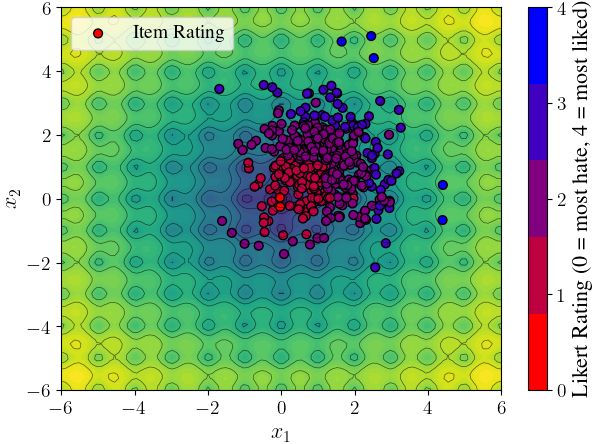

In [8]:
import torch
from botorch.test_functions.synthetic import Ackley
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Custom discrete colormap: red for lowest rating (0) to blue for highest rating (4)
likert_cmap = LinearSegmentedColormap.from_list("likert_scale", ["red", "blue"], N=5)

torch.manual_seed(0)
from tueplots import bundles
bundles.icml2024()
plot_config = bundles.icml2024(usetex=True, family="serif")
plot_config.update({
    "font.size": 14,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "axes.titlesize": 16,
})

# Settings and function evaluation
n_samples = 400
d = 2
utility_fn = Ackley(dim=d)
items = torch.randn(n_samples, d) + torch.ones(n_samples, d)
utilities = utility_fn(items)

# Normalize utilities to get ratings from 0 to 4
min_util, max_util = utilities.min(), utilities.max()
# Avoid division by zero in case all utilities are equal
if max_util - min_util > 0:
    normalized = (utilities - min_util) / (max_util - min_util)
else:
    normalized = torch.zeros_like(utilities)
ratings = torch.round(normalized * 4).squeeze()  # discrete ratings 0,1,2,3,4

# Visualize the Ackley function as a heatmap
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)
Z = utility_fn(torch.tensor(np.c_[X.ravel(), Y.ravel()])).reshape(X.shape)

with plt.rc_context(plot_config):
    plt.figure(figsize=(6, 4.5))
    contour = plt.contourf(X, Y, Z.numpy(), 50, cmap='viridis')
    plt.contour(X, Y, Z.numpy(), levels=15, colors='black', linewidths=0.5, alpha=0.6)
    
    # Plot items with their Likert rating
    scatter = plt.scatter(items[:, 0], items[:, 1], c=ratings.numpy(), cmap=likert_cmap,
                          s=40, edgecolor='k', label='Item Rating')
    
    # Create a colorbar with discrete ticks for ratings 0 to 4
    cbar = plt.colorbar(scatter, ticks=[0, 1, 2, 3, 4])
    cbar.set_label('Likert Rating (0 = most hate, 4 = most liked)')
    
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend()
    plt.show()


/Users/sangttruong/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Times.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sangttruong/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Times.
  fig.canvas.print_figure(bytes_io, **kw)


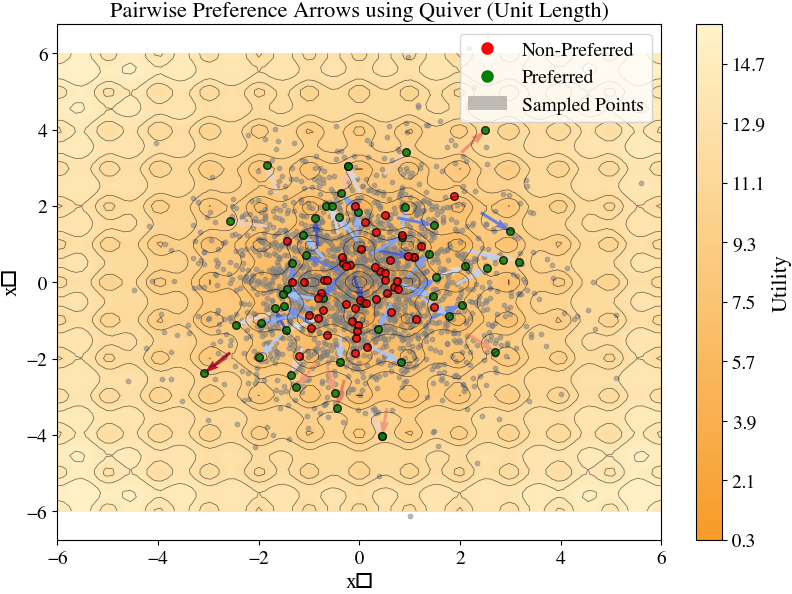

In [23]:
import torch
from botorch.test_functions.synthetic import Ackley
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from tueplots import bundles

# Define a high-contrast custom colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_ackley", ["#F89B28", "#FFF2C9"], N=100)

# Set a random seed for reproducibility
torch.manual_seed(0)

# Configure ICML 2024 style with larger font sizes
plot_config = bundles.icml2024(usetex=False, family="serif")
plot_config.update({
    "font.size": 14,         # Increase base font size
    "axes.labelsize": 16,      # Increase axis label font size
    "xtick.labelsize": 14,     # Increase x-axis tick labels
    "ytick.labelsize": 14,     # Increase y-axis tick labels
    "legend.fontsize": 14,     # Increase legend font size
    "axes.titlesize": 16,      # Increase title font size
})

# Problem setup
n_samples = 2000  # Fewer points for clarity
d = 2
utility_fn = Ackley(dim=d)
items = torch.randn(n_samples, d)*1.5
utilities = utility_fn(items)

# Generate pairwise comparisons (randomly choose pairs)
n_pairs = 50
indices = torch.randint(0, n_samples, (n_pairs, 2))
items_A, items_B = items[indices[:, 0]], items[indices[:, 1]]
utilities_A, utilities_B = utilities[indices[:, 0]], utilities[indices[:, 1]]

# Create condition for pairwise comparisons
condition = (utilities_A > utilities_B).view(-1, 1)  # shape: (n_pairs, 1)
condition_expanded = condition.expand(-1, items_A.shape[1])  # shape: (n_pairs, 2)

# Determine pairwise preferences row-wise
preferred_items = torch.where(condition_expanded, items_A, items_B)
non_preferred_items = torch.where(condition_expanded, items_B, items_A)
utility_diff = torch.abs(utilities_A - utilities_B)  # Preference strength

# Create the heatmap grid
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)
Z = utility_fn(torch.tensor(np.c_[X.ravel(), Y.ravel()])).reshape(X.shape)

# Convert pairwise items to numpy arrays for quiver processing
non_pref_np = non_preferred_items.numpy()
pref_np = preferred_items.numpy()

# Compute the vector from non-preferred to preferred and its norm
v = pref_np - non_pref_np
norm = np.linalg.norm(v, axis=1, keepdims=True)

# Avoid division by zero; if norm==0, set unit vector to 0 (though rarely occurs)
unit_vector = np.divide(v, norm, where=(norm != 0))
unit_vector = unit_vector * 0.75

# Compute the tail of the arrow so that the head (preferred point) is 1 unit away from the tail
tail = pref_np - unit_vector  # Arrow tail
# The arrow vector will be unit_vector (length 1), so tail + unit_vector = preferred point

# Normalize utility differences for color mapping
norm_utility = utility_diff.numpy() / utility_diff.numpy().max()
colors = plt.cm.coolwarm(norm_utility)

# Generate the visualization using quiver for preference arrows
with plt.rc_context(plot_config):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Contour heatmap
    contour = ax.contourf(X, Y, Z, 50, cmap=custom_cmap)
    ax.contour(X, Y, Z, levels=15, colors='black', linewidths=0.5, alpha=0.6)
    
    # Scatter plot of all items
    ax.scatter(items[:, 0], items[:, 1], c="gray", s=10, alpha=0.5, label="Sampled Points")
    
    # Use quiver to draw unit-length arrows with heads at the preferred points
    ax.quiver(tail[:, 0], tail[:, 1],
              unit_vector[:, 0], unit_vector[:, 1],
              angles='xy', scale_units='xy', scale=1,
              width=0.005, color=colors, alpha=0.9)
    
    # Highlight the preferred and non-preferred points individually
    ax.scatter(pref_np[:, 0], pref_np[:, 1], c="green", s=30, alpha=0.8, edgecolor="black", label="Preferred")
    ax.scatter(non_pref_np[:, 0], non_pref_np[:, 1], c="red", s=30, alpha=0.8, edgecolor="black", label="Non-Preferred")
    
    # Color bar for the underlying utility function heatmap
    fig.colorbar(contour, ax=ax, label='Utility')
    
    # Labels and title
    ax.set_xlabel('x₁')
    ax.set_ylabel('x₂')
    ax.set_title("Pairwise Preference Arrows using Quiver (Unit Length)")
    
    # Create a custom legend
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch
    
    legend_elements = [
        Line2D([0], [0], color='red', marker='o', markersize=8, lw=0, label='Non-Preferred'),
        Line2D([0], [0], color='green', marker='o', markersize=8, lw=0, label='Preferred'),
        Patch(facecolor='gray', alpha=0.5, label='Sampled Points')
    ]
    
    ax.legend(handles=legend_elements, loc='upper right')
    plt.show()


/var/folders/zg/bt91gb112f1c31zr9k67gctw0000gn/T/ipykernel_34605/1882893028.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  items_z = utility_fn(torch.tensor(items, dtype=torch.float)).numpy().flatten()
/Users/sangttruong/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Times.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sangttruong/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Times.
  fig.canvas.print_figure(bytes_io, **kw)


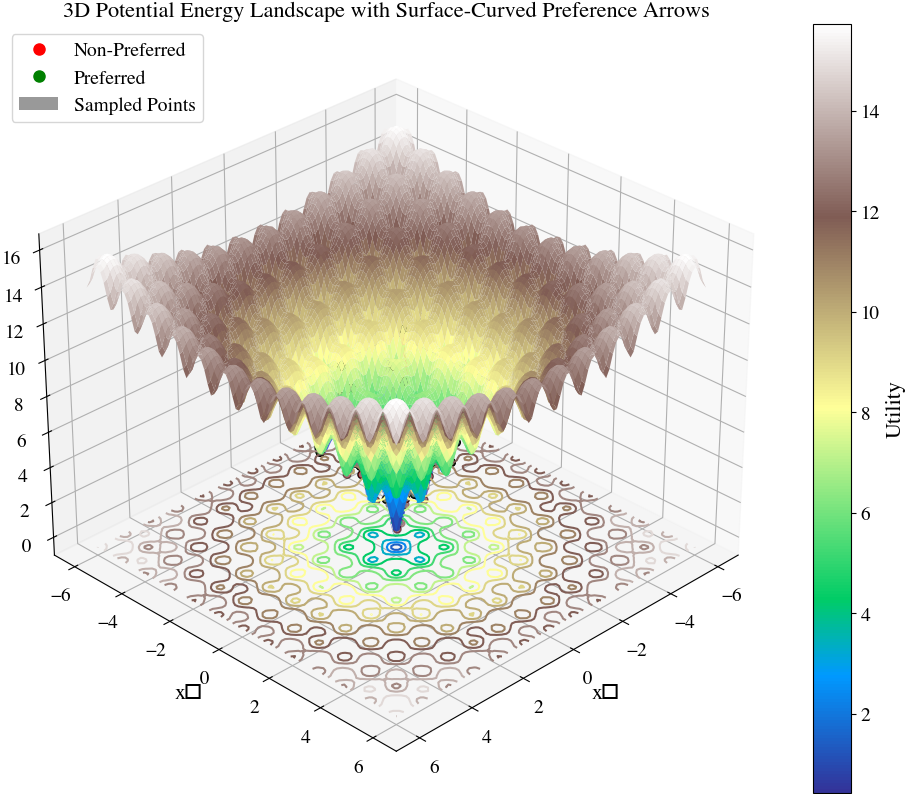

In [40]:
import torch
from botorch.test_functions.synthetic import Ackley
import matplotlib.pyplot as plt
import numpy as np
from tueplots import bundles
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Set a random seed for reproducibility
torch.manual_seed(0)

# Configure ICML 2024 style with larger font sizes
plot_config = bundles.icml2024(usetex=False, family="serif")
plot_config.update({
    "font.size": 14,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "axes.titlesize": 16,
})

# Problem setup
n_samples = 200
d = 2
utility_fn = Ackley(dim=d)
items = torch.randn(n_samples, d)
utilities = utility_fn(items)

# Generate pairwise comparisons (randomly choose pairs)
n_pairs = 100
indices = torch.randint(0, n_samples, (n_pairs, 2))
items_A, items_B = items[indices[:, 0]], items[indices[:, 1]]
utilities_A, utilities_B = utilities[indices[:, 0]], utilities[indices[:, 1]]

# Determine pairwise preferences (preferred: higher utility)
condition = (utilities_A > utilities_B).view(-1, 1)
condition_expanded = condition.expand(-1, items_A.shape[1])
preferred_items = torch.where(condition_expanded, items_A, items_B)
non_preferred_items = torch.where(condition_expanded, items_B, items_A)
utility_diff = torch.abs(utilities_A - utilities_B)

# Create a grid for the surface (the 3D Ackley surface)
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)
XY_grid = np.c_[X.ravel(), Y.ravel()]
Z = utility_fn(torch.tensor(XY_grid, dtype=torch.float)).reshape(X.shape).numpy()

# Define a helper to compute the surface height at a given (x,y)
def surface_z(x_val, y_val):
    pt = torch.tensor([[x_val, y_val]], dtype=torch.float)
    return utility_fn(pt).item()

# Convert pairwise items to numpy for the (x, y) plane and compute z on the surface
non_pref_np = non_preferred_items.numpy()
pref_np = preferred_items.numpy()
non_pref_z = utility_fn(torch.tensor(non_pref_np, dtype=torch.float)).numpy().flatten()
pref_z = utility_fn(torch.tensor(pref_np, dtype=torch.float)).numpy().flatten()

# For each arrow, we define its tail in the (x,y) plane to be 1 unit away from the preferred point.
# We use the 2D vector from the non-preferred to the preferred point to set the arrow's direction.
arrows = []  # Will hold tuples of (tail, head, color)
for i in range(n_pairs):
    p_xy = pref_np[i]  # preferred (x, y)
    n_xy = non_pref_np[i]  # non-preferred (x, y)
    vec = p_xy - n_xy
    norm = np.linalg.norm(vec)
    if norm == 0:
        continue  # skip degenerate case
    unit_vec = vec / norm
    # Define tail as preferred point minus 1 unit along the direction.
    tail_xy = p_xy - unit_vec  
    # Compute z coordinates for tail and head from the surface.
    tail_z = surface_z(tail_xy[0], tail_xy[1])
    head_z = pref_z[i]
    arrows.append((tail_xy, p_xy, tail_z, head_z))

# Normalize utility differences for color mapping
norm_utility = utility_diff.numpy().flatten() / utility_diff.numpy().max()
colors = plt.cm.coolwarm(norm_utility)

# Create a 3D plot with an opaque surface resembling a nested potential energy landscape.
with plt.rc_context(plot_config):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=100, azim=145)
    
    # Plot an opaque surface using plot_surface with the 'terrain' colormap.
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='terrain', edgecolor='none', alpha=1.0)
    fig.colorbar(surf, ax=ax, label='Utility')
    
    # Optionally add contour lines on the surface to enhance the nested look.
    ax.contour(X, Y, Z, 15, offset=np.min(Z)-1, cmap='terrain', linestyles="solid")
    
    # Plot the sampled points on the surface.
    items_z = utility_fn(torch.tensor(items, dtype=torch.float)).numpy().flatten()
    ax.scatter(items[:, 0], items[:, 1], items_z, c="gray", s=10, alpha=0.8, label="Sampled Points")
    
    # For each pair, compute a curved arrow that follows the surface.
    # We interpolate in the (x,y) plane between the tail and the head,
    # and compute the z coordinate using the surface function.
    n_interp = 20  # number of points to interpolate along the arrow curve
    for i, (tail_xy, head_xy, tail_z, head_z) in enumerate(arrows):
        t_vals = np.linspace(0, 1, n_interp)
        arrow_x = tail_xy[0] + t_vals * (head_xy[0] - tail_xy[0])
        arrow_y = tail_xy[1] + t_vals * (head_xy[1] - tail_xy[1])
        # Compute z along the curve using the Ackley function so that the curve lies on the surface.
        arrow_z = np.array([surface_z(x_val, y_val) for x_val, y_val in zip(arrow_x, arrow_y)])
        # Plot the curved arrow.
        ax.plot(arrow_x, arrow_y, arrow_z, color=colors[i], linewidth=1.5)
        # Optionally, mark the arrow head.
        ax.scatter(head_xy[0], head_xy[1], head_z, color=colors[i], s=30, edgecolor="black")
    
    # Highlight the preferred and non-preferred points.
    ax.scatter(pref_np[:, 0], pref_np[:, 1], pref_z, c="green", s=30, edgecolor="black", label="Preferred")
    ax.scatter(non_pref_np[:, 0], non_pref_np[:, 1], non_pref_z, c="red", s=30, edgecolor="black", label="Non-Preferred")
    
    # Set axis labels and title.
    ax.set_xlabel('x₁')
    ax.set_ylabel('x₂')
    ax.set_zlabel('Utility')
    ax.set_title("3D Potential Energy Landscape with Surface-Curved Preference Arrows")
    
    # Rotate view for better perspective.
    ax.view_init(elev=30, azim=45)
    
    # Create a legend.
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch
    legend_elements = [
        Line2D([0], [0], color='red', marker='o', markersize=8, lw=0, label='Non-Preferred'),
        Line2D([0], [0], color='green', marker='o', markersize=8, lw=0, label='Preferred'),
        Patch(facecolor='gray', alpha=0.8, label='Sampled Points')
    ]
    ax.legend(handles=legend_elements, loc='upper left')
    
    plt.show()


In [ ]:
import numpy as np
from mayavi import mlab
# from matplotlib.cm import get_cmap # for viridis

def f(x, y):
    return np.sin(2*x) * np.cos(2*y)

# data for the surface
x = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, x)
Z = f(X, Y)

# data for the scatter
xx = 4*np.random.rand(1000) - 2
yy = 4*np.random.rand(1000) - 2
zz = f(xx,yy)

fig = mlab.figure(bgcolor=(1,1,1))
# note the transpose in surf due to different conventions compared to meshgrid
su = mlab.surf(X.T, Y.T, Z.T)
sc = mlab.points3d(xx, yy, zz, scale_factor=0.1, scale_mode='none',
                   opacity=1.0, resolution=20, color=(1,0,0))

# manually set viridis for the surface
# cmap_name = 'viridis'
# cdat = np.array(get_cmap(cmap_name,256).colors)
# cdat = (cdat*255).astype(int)
# su.module_manager.scalar_lut_manager.lut.table = cdat

mlab.show()